<a href="https://colab.research.google.com/github/DevRichan/PF-2-Data-Science-in-Telco-Data-Cleansing/blob/master/Data_Visualization_(Telco_DQLab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization (Telco DQ Lab)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('Data_Telco.csv')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('valid_id',axis=1,inplace=True)

In [ ]:
# df.iloc[3]

In [ ]:
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45315483266,Male,0,Yes,No,60.0,Yes,No,No,...,No internet service,No internet service,No internet service,No,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
2,202006,45236961615,Male,0,No,No,5.0,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
3,202006,45929827382,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4,202006,45305082233,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


## I. Comparisson of male and female customers

In [5]:
# Total Customer berdasarkan gender
tc_gender = df['gender'].value_counts().to_frame()

In [6]:
# perbandingan jumlah customer pria dan wanita
fig = px.pie(data_frame=tc_gender,values='gender',names=tc_gender.index,color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()

## II. Comparisson of users payment methods used by customers

In [7]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Bank transfer (automatic)', 'Mailed check',
       'Credit card (automatic)'], dtype=object)

In [8]:
total_pm = df['PaymentMethod'].value_counts()
df_total_pm = total_pm.to_frame().copy()
df_total_pm['percentage'] = round((df_total_pm['PaymentMethod'] / df_total_pm['PaymentMethod'].sum()) * 100,1)
# df_total_pm

In [9]:
plt.figure(figsize=(15,5))
fig = px.pie(data_frame=df_total_pm,values='PaymentMethod',names=df_total_pm.index,color_discrete_sequence=px.colors.sequential.RdBu) 
fig.show()

<Figure size 1080x360 with 0 Axes>

### - Comparison by sex

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

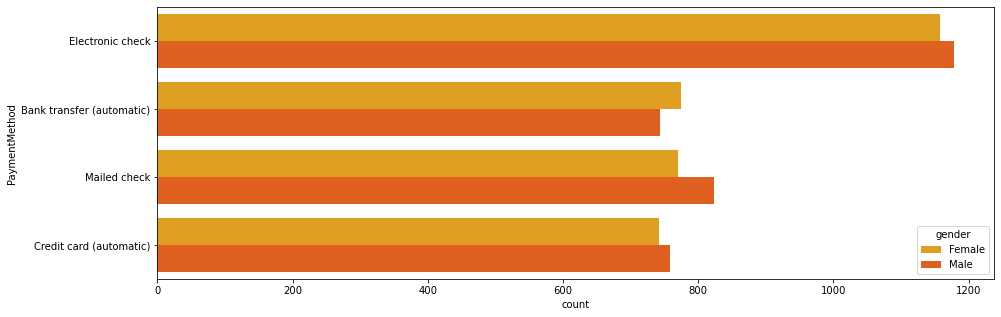

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,y='PaymentMethod',hue='gender',palette="autumn_r")

In [ ]:
# male_ec = len(df[(df['gender']=="Male") & (df['PaymentMethod']=='Electronic check')])
# female_ec = len(df[(df['gender']=="Female") & (df['PaymentMethod']=='Electronic check')])
# male_mc = len(df[(df['gender']=="Male") & (df['PaymentMethod']=='Mailed check')])
# female_mc = len(df[(df['gender']=="Female") & (df['PaymentMethod']=='Mailed check')])
# male_bt = len(df[(df['gender']=="Male") & (df['PaymentMethod']=='Bank transfer (automatic)')])
# female_bt = len(df[(df['gender']=="Female") & (df['PaymentMethod']=='Bank transfer (automatic)')])
# male_cc = len(df[(df['gender']=="Male") & (df['PaymentMethod']=='Credit card (automatic)')])
# female_cc = len(df[(df['gender']=="Female") & (df['PaymentMethod']=='Credit card (automatic)')])
# dict_payment = {
#     'gender': ['Male','Female','Male','Female','Male','Female','Male','Female'],
#     'title' : ['Electronic check', 'Electronic check', 'Mailed check', 'Mailed check', 'Bank transfer (automatic)',
#              'Bank transfer (automatic)','Credit card (automatic)','Credit card (automatic)'],
#     'val' : [male_ec,female_ec,male_mc,female_mc,male_bt,female_bt,male_cc,female_cc]
# }

# df_payment = pd.DataFrame.from_dict(dict_payment)
# # function sum abaikan
# df_payment.groupby(['gender','title'])['val'].sum()

## III. Customers who install streaming movies


### - Standardization of Categorical Variables

In [ ]:
df['StreamingMovies'].unique()

array(['No', 'No internet service', 'Yes'], dtype=object)

In [ ]:
df['StreamingMovies'].value_counts()

No                     2747
Yes                    2698
No internet service    1505
Name: StreamingMovies, dtype: int64

In [ ]:
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'],['No'])

In [ ]:
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['StreamingMovies'].value_counts()

No     4252
Yes    2698
Name: StreamingMovies, dtype: int64

### - Total Customers who use the streaming movie

<AxesSubplot:xlabel='count', ylabel='StreamingMovies'>

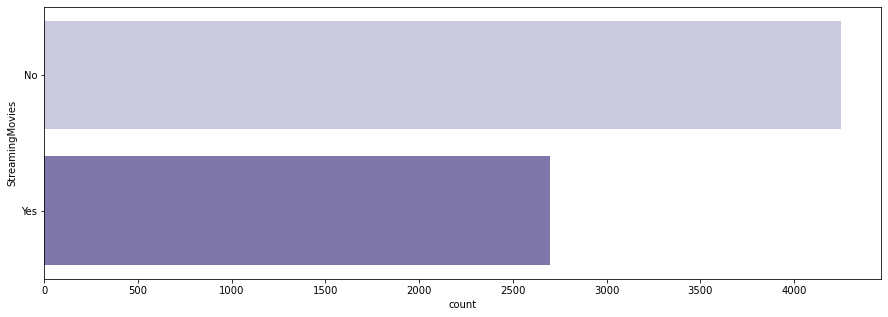

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,y='StreamingMovies',palette='Purples')

### - Total Customers who use the streaming movie by gender

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

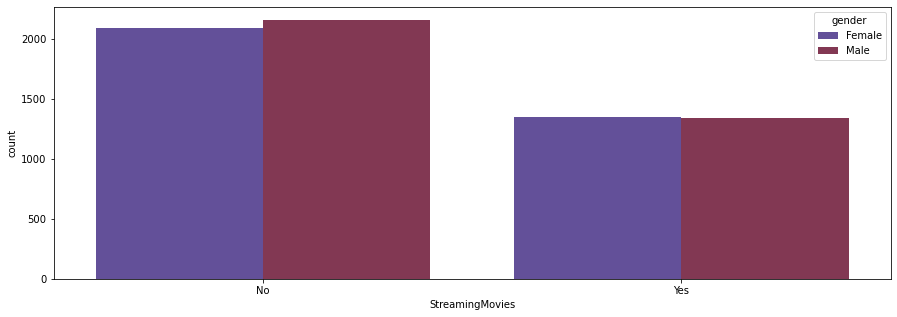

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='StreamingMovies',hue='gender',palette='twilight')

--------------------

## IV. Number of Contracts by Category

- Comparison contracts ('Month-to-month', 'Two year', 'One year')

In [10]:
val = df['Contract'].value_counts()
ccontract = pd.DataFrame({
    'title' : ['Month-to-month','Two year','One year'],
    'val' : [val[0],val[1],val[2]]
})
ccontract

,title,val
0,Month-to-month,3823
1,Two year,1670
2,One year,1457


In [11]:
fig = px.pie(data_frame=ccontract,values='val',names='title',color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.show()

## V. Number of Senior Citizen

info column : Whether the customer is a senior citizen or not (1, 0)

In [12]:
df['SeniorCitizen'].unique()

array([0, 1])

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [14]:
df['SeniorCitizen'].describe()

count     6950
unique       2
top          0
freq      5822
Name: SeniorCitizen, dtype: object

In [15]:
dfs = df['SeniorCitizen'].value_counts().to_frame()
dfs

,SeniorCitizen
0,5822
1,1128


In [16]:
fig = px.pie(dfs,values='SeniorCitizen',names=df['SeniorCitizen'].unique(),color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

## VI. Customers Using Telephone Services

In [17]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
df['PhoneService'].value_counts()

Yes    6281
No      669
Name: PhoneService, dtype: int64

In [19]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df['PhoneService'].unique(), y=list(df['PhoneService'].value_counts()))])
fig.update_layout(barmode='group')
fig.show()

## VII. The Number of Each Internet Service by Category

In [ ]:
# category
df['InternetService'].unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='InternetService'>

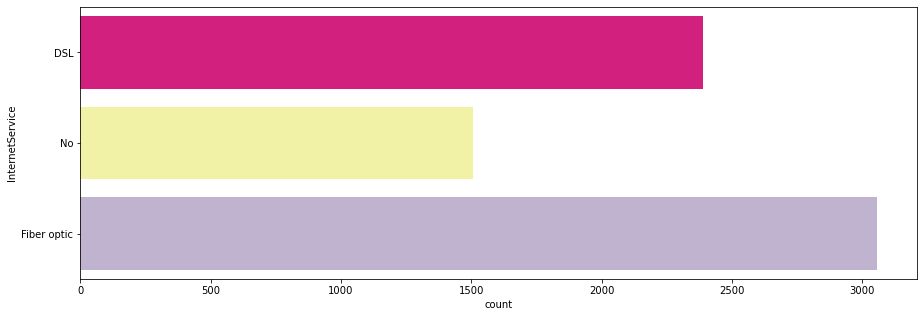

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,y=df['InternetService'],palette='Accent_r')

## VIII. The Highest Total Charges Based on Contract Category

In [20]:
#category
x = df['Contract'].unique()
x

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [21]:
maxx = []
for item in df['Contract'].unique():
    ma = df[df['Contract']==item]['TotalCharges'].max()
    ma2 = df[(df['Contract']==item) & (df['TotalCharges']==ma)].index
    maxx.append(ma2)
#     maxx.append(ma2)
maxx

[Int64Index([966], dtype='int64'),
 Int64Index([424], dtype='int64'),
 Int64Index([347], dtype='int64')]

In [22]:
idx = []
for ix in range(len(maxx)):
    idx.append(maxx[ix][0])
df.iloc[idx]

,Unnamed: 0,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
966,3820,202006,45948195254,Male,1,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),112.90000,8061.50000,No,True
424,4586,202006,45756943547,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),169.93125,8889.13125,No,True
347,4610,202006,45288966283,Male,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80000,8889.13125,Yes,True


## IX. Number of churn customers

<AxesSubplot:xlabel='Churn', ylabel='count'>

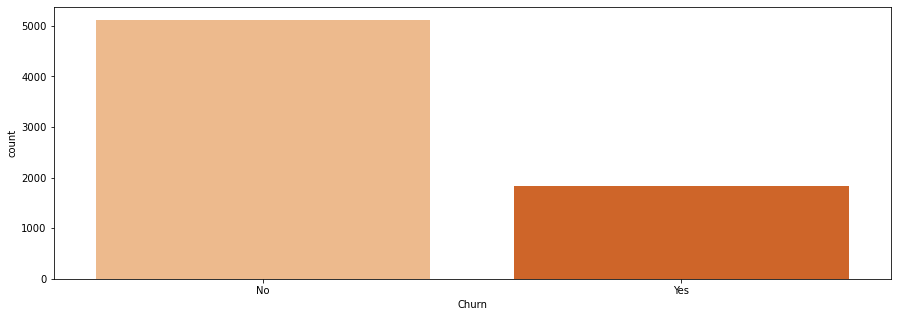

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Churn',palette='Oranges')

### - comparisson customer churn by gender

In [23]:
churn_male_yes = len(df[(df['gender'] == 'Male') & (df['Churn'] == 'Yes')])
churn_male_no = len(df[(df['gender'] == 'Male') & (df['Churn'] == 'No')])
churn_female_yes = len(df[(df['gender'] == 'Female') & (df['Churn'] == 'Yes')])
churn_female_no = len(df[(df['gender'] == 'Female') & (df['Churn'] == 'No')])

churnn = {
    'title' : ['Male (Churn = Yes)','Male (Churn = No)','Female Yes (Churn = Yes)','Female (Churn = No)'],
    'val' : [churn_male_yes,churn_male_no,churn_female_yes,churn_female_no]
}

df_payment = pd.DataFrame.from_dict(churnn)
df_payment['percentage'] = round((df_payment['val'] / df_payment['val'].sum()) * 100,1)
df_payment

,title,val,percentage
0,Male (Churn = Yes),913,13.1
1,Male (Churn = No),2592,37.3
2,Female Yes (Churn = Yes),923,13.3
3,Female (Churn = No),2522,36.3


In [24]:
fig = px.pie(df_payment,values='val',names='title',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## X. Correlations Between Tables

<AxesSubplot:>

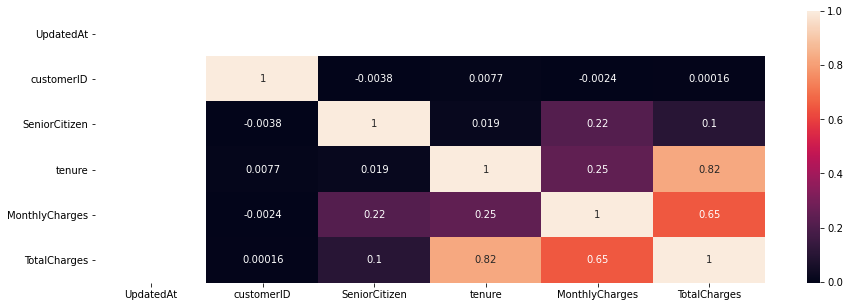

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)